<a href="https://colab.research.google.com/github/SecondThread/MachineLearningClass/blob/master/HW_2/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1 P3: Saddle Point
Consider the function $f_3(x_1, x_2)=x_1*x_2-3*x_1$. Notice that $\nabla f_3 = [df_3/dx_1, df_3/dx_2]$. In this case $\nabla f_3$ is $[x_2-3, x_1]$ The saddle point is located at $(0, 3)$. The code below shows the function graphed in three dimensions:

I don't have the mathematical background to prove that it is in fact a saddle point (but I can write code that verifies it, and you can clearly see from these helpful graphs that it is a saddle point)

In [0]:
#import mathplotlib and show plot
#code as in demo from https://colab.research.google.com/drive/1btvbObh-nZ4MSC7QkjpS3RGpefN_msth 
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 0, 'Z')

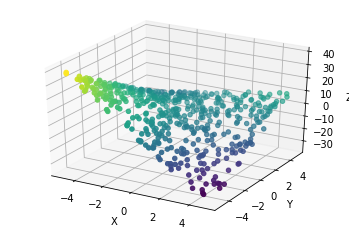

In [0]:

#Generate data that matches the function f1(x, y) = x*y - 3x
fig = plt.figure()
ax = plt.axes(projection='3d');
xcoords = np.random.random(500)*10-5;
ycoords = np.random.random(500)*10-5;

zcoords = xcoords*ycoords - 3*xcoords;
ax.scatter3D(xcoords, ycoords, zcoords, c=zcoords,  cMap='Greens')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

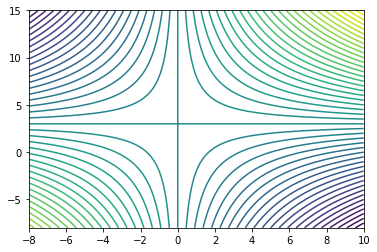

In [0]:
#Density plots for f1:
def f3(x, y):
  return x*y - 3*x;

x = np.linspace(-8, 10, 500);
y = np.linspace(-8, 15, 500);
X, Y = np.meshgrid(x, y);
Z = f3(X, Y);
plt.contour(X, Y, Z, 50);

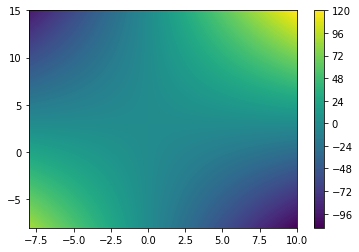

In [0]:
plt.contourf(X, Y, Z, 200);
plt.colorbar();

And finally, another pretty 3D graph of F1 to make it especially clear what the function looks like:

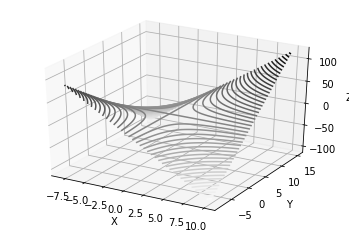

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Problem 1 P1: Local Minima
Now for a slightly less interesting function:
$f_1(x, y) = x*(x-2)*y*(y+3) + y^4 + x^2/2$. It isn't immeditely clear what this function looks like or where its minimum will be without some complex math. Let's use some nice pictures to find out!


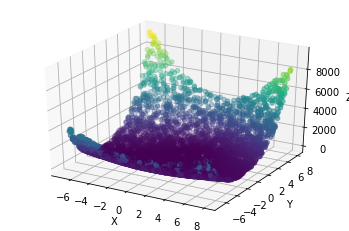

In [0]:
def f1(x, y):
  return x*(x-2)*y*(y+3) + y**4 + (x**2)*5.0;

fig = plt.figure()
ax = plt.axes(projection='3d');
xcoords = np.random.random(5000)*15-7;
ycoords = np.random.random(5000)*15-7;
zcoords = f1(xcoords, ycoords);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(xcoords, ycoords, zcoords, c=zcoords)

It appears that the minimum might be located somewhere around the origin... Let's take a closer look:

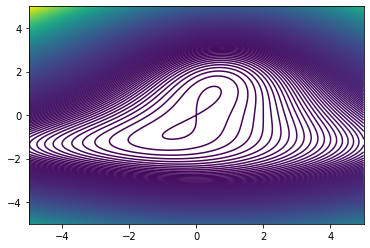

In [0]:
x = np.linspace(-5, 5, 500);
y = np.linspace(-5, 5, 500);
X, Y = np.meshgrid(x, y);
Z = f1(X, Y);
plt.contour(X, Y, Z, 500);

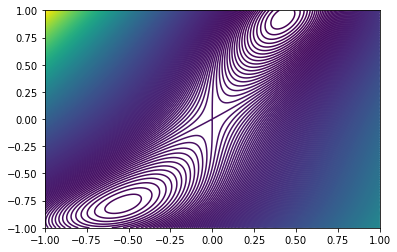

In [0]:
x = np.linspace(-1, 1, 500);
y = np.linspace(-1, 1, 500);
X, Y = np.meshgrid(x, y);
Z = f1(X, Y);
plt.contour(X, Y, Z, 500);

Text(0.5, 0, 'Z')

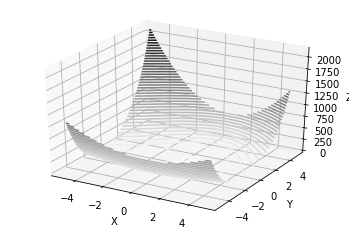

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

It looks like $f_1$ actually has two local minima! Who would have guessed!

#Problem 1 P2: Local Maximum
Finally, let's look at $f_2(x, y) = -(x-4)^2-(3+y)^2$. Clearly, this function is a bit contrived to have a clearly have a maximum at $(4, -3)$, making it rather uninteresting, which is why I saved it for last. Here are the graphs as requested though:


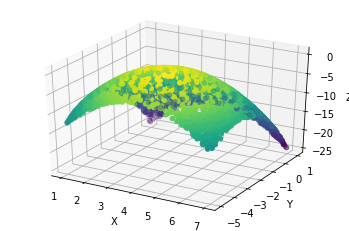

In [0]:
def f2(x, y):
  return -(x-4)**2-(3+y)**2;

fig = plt.figure()
ax = plt.axes(projection='3d');
xcoords = np.random.random(5000)*6+1;
ycoords = np.random.random(5000)*6-5;
zcoords = f2(xcoords, ycoords);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(xcoords, ycoords, zcoords, c=zcoords)


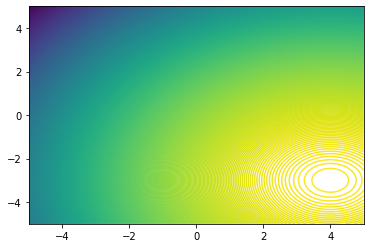

In [0]:
x = np.linspace(-5, 5, 500);
y = np.linspace(-5, 5, 500);
X, Y = np.meshgrid(x, y);
Z = f2(X, Y);
plt.contour(X, Y, Z, 500);

Text(0.5, 0, 'Z')

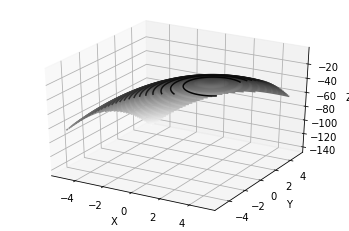

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Problem 2: Multi-Mini Batch Gradient Descent
Let's pick the plane $z = -3*x-2*y+40$.


Text(0.5, 0, '$y$')

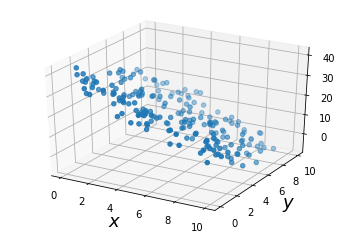

In [0]:
import numpy as np;
%matplotlib inline
import matplotlib.pyplot as plt

#plane: z = -.75*x -2*y + 40
def f(x, y):
  return -3*x - 2*y +40;

N_SAMPLES=200;

#Generate random xs and ys with magnitude up to 10
X = 10*np.random.random(N_SAMPLES);
Y = 10*np.random.random(N_SAMPLES);

#Evaluate the xs and ys, and add +/-5 as noise
Z = f(X, Y) + np.random.random(N_SAMPLES)*10 - 5;

#plot them to show that theyre is added noise
ax = plt.axes(projection='3d');
ax.scatter3D(X, Y, Z);
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

In [0]:
bXY=np.column_stack([np.ones((N_SAMPLES, 1)), X, Y]);
print(bXY.shape)

(200, 3)


In [0]:
np.random.seed(8675309);
initial_weight = np.random.random(3);
epochs=60;
LEARNING_RATE=0.01;

weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(N_SAMPLES)
    bXY_shuffled = bXY[shuffled_indices]
    z_shuffled = Z[shuffled_indices]
    for i in range(0, N_SAMPLES, batch_size):
        xyi = bXY_shuffled[i:i+batch_size]
        zi = z_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xyi.T.dot(xyi.dot(weight) - zi)
        weight = weight - LEARNING_RATE * gradient
        weight_path_mgd.append(weight)

weight_path_mgd[-1]

array([39.75982605, -2.92677121, -2.01568258])

(3,) (200, 3) (200,)


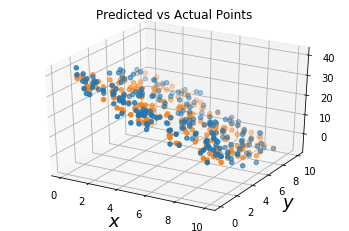

In [0]:
ax = plt.axes(projection='3d');
final_weights = weight_path_mgd[-1];
Z_hats=bXY.dot(final_weights);
print(final_weights.shape, bXY.shape, Z_hats.shape)
ax.scatter3D(X, Y, Z);
ax.scatter3D(X, Y, Z_hats);
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title("Predicted vs Actual Points");

#Problem 3: Average MNIST digit


In [0]:
#Setup tensorflow and import tensorflow/keras
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

2.1.0
2.2.5


Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1000.0
(10, 28, 28)


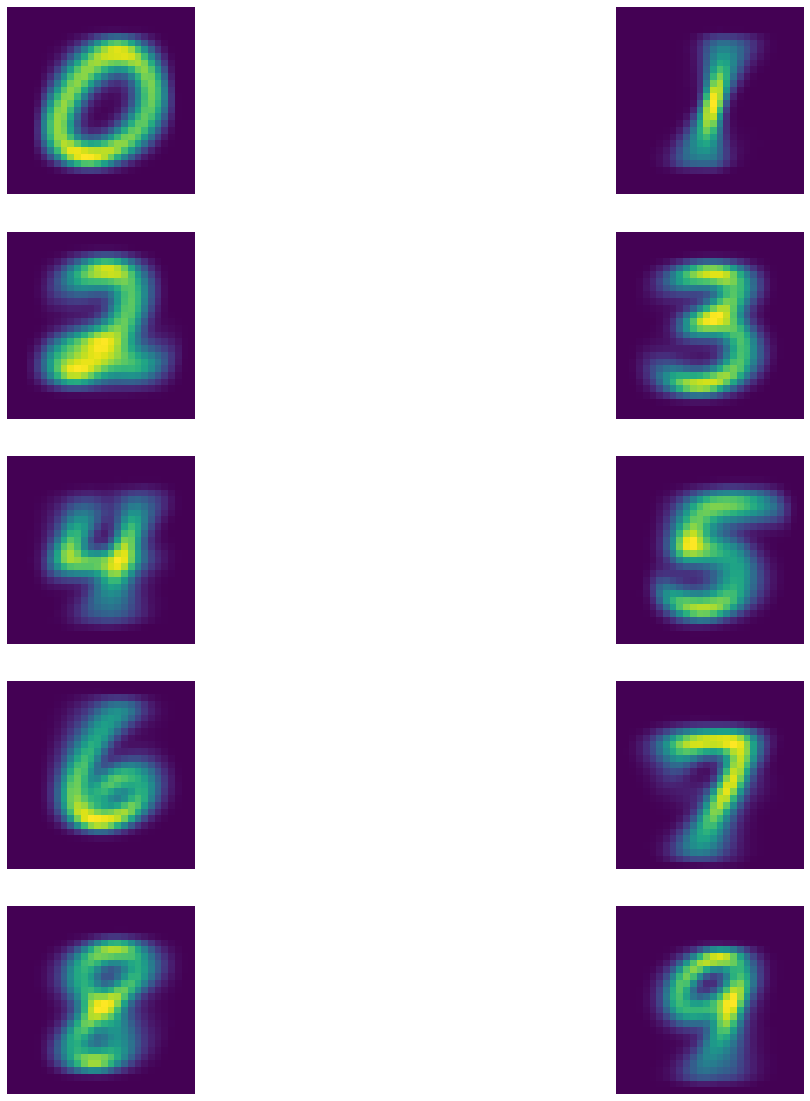

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
some_digit = train_images[1]/255.0*1000;
flattened= [val for sublist in some_digit for val in sublist]
print(max(flattened));

#Initially all zeros
sums_of_image=np.zeros((10, 28, 28));
print(sums_of_image.shape)
for i in range(len(train_labels)):
  sums_of_image[train_labels[i]]+=train_images[i]/255.0;

#Conveniently, we don't have to normalize these,
#since matplotlib does that automatically for us
plt.figure(figsize=(20, 20))
for digit in range(10):
  plt.subplot(5, 2, 1+digit);
  plt.imshow(sums_of_image[digit]);
  plt.axis('off')